<a href="https://colab.research.google.com/github/s23912/pad/blob/main/PAD_PROJEKT_pawel_ungier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Pawel Ungier

In [2]:
import pandas as pd
path = '/content/drive/MyDrive/PAD/PROJEKT/BostonHousing.csv'
df = pd.read_csv(path, sep=',')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Zadanie 1 (6ptk) Dokonaj podziału danych na zbiór treningowy i test w proporcji 0,75/0,25.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
Y = df['medv'] # zmienna celu
X = df.drop(['medv'], axis = 1) # dane
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

#Zadanie 2 (6ptk) Usuń ze zbioru kolumną „Chas”. Dokonaj standaryzacji wszystkich kolumn poza „Medv”


In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = X_train.drop(['chas'], axis = 1)
X_test = X_test.drop(['chas'], axis = 1)

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)


In [5]:
print(X_train.mean(axis = 0))
print(X_train.std(axis = 0))

[-8.43652325e-17  2.22630475e-17  3.35117451e-16 -4.89787044e-16
 -4.92130523e-17 -9.84261046e-17  1.40608721e-17  8.08500145e-17
  9.72543652e-17 -7.82721879e-16 -1.17173934e-17 -2.23802214e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


#Zadanie 3 (6ptk) Przedstaw w formie heatmapy oraz ramki danych, macierz korelacji dla wszystkich kolumn danych.


In [6]:
df_correlation = df.corr()
df_correlation

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


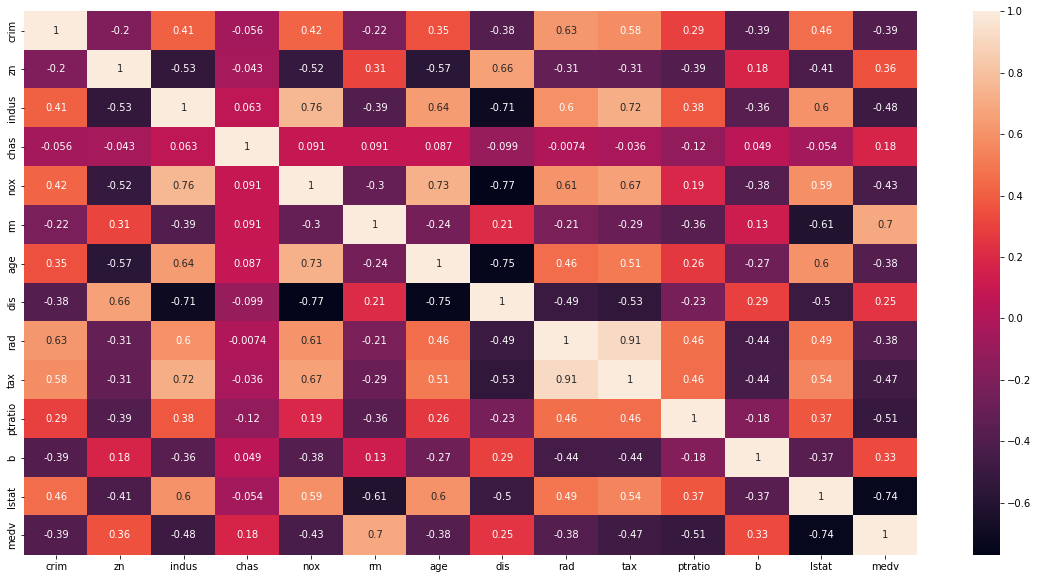

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(df_correlation, annot = True)

#Modelling
#Zmienna celu: MEDV
#Zadanie 1 (8ptk) Przeprowadź regresję z użyciem modelu liniowego. Wskaż zmienne dla których wartość parametru liniowego była najwyższa.


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

Linear_r = LinearRegression()
Linear_r.fit(X_train, y_train)
prediction_lr = Linear_r.predict(X_test)


In [9]:
from heapq import nlargest
Linear_r.coef_

array([-1.12591067,  0.72082148,  0.47429032, -1.81069397,  3.18525691,
       -0.2279217 , -2.9928517 ,  2.42129716, -1.86967167, -2.15051862,
        1.20404368, -3.81114543])

In [10]:
coefficience = Linear_r.coef_
column_names = X.drop('chas', axis=1).columns

coefficiecoef_dict = {}

for coef, name in zip(coefficience, column_names):
  coefficiecoef_dict[name] = coef

highest_coef = nlargest(3, coefficiecoef_dict , key = coefficiecoef_dict.get)  
for val in highest_coef: 
    print(val, ":", coefficiecoef_dict.get(val))  

rm : 3.1852569065005563
rad : 2.421297162959286
b : 1.2040436849553866


#Zadanie 2 (8ptk) Przeprowadź regresję z użyciem sieci neuronowej o 3 warstwach (po trzy neurony w każdej warstwie)


In [11]:
import keras
model = keras.Sequential([
keras.layers.Dense(3, activation = 'relu', input_shape = (X_train[0].shape)),
keras.layers.Dense(3, activation = 'relu'),
keras.layers.Dense(3, activation = 'relu'),
keras.layers.Dense(1, activation='linear', name='output')
])

In [12]:
model.compile(
    optimizer = 'adam',
    loss='mse', 
    metrics=['mae']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 39        
                                                                 
 dense_1 (Dense)             (None, 3)                 12        
                                                                 
 dense_2 (Dense)             (None, 3)                 12        
                                                                 
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [13]:
logs = model.fit(X_train, y_train, epochs=60, validation_split=0.1)


Epoch 1/60
11/11 [==============================] - 2s 41ms/step - loss: 628.5330 - mae: 23.3109 - val_loss: 606.7720 - val_mae: 23.1066
Epoch 2/60
11/11 [==============================] - 0s 7ms/step - loss: 625.3192 - mae: 23.2297 - val_loss: 603.9269 - val_mae: 23.0399
Epoch 3/60
11/11 [==============================] - 0s 6ms/step - loss: 622.7155 - mae: 23.1624 - val_loss: 601.3978 - val_mae: 22.9800
Epoch 4/60
11/11 [==============================] - 0s 8ms/step - loss: 620.4966 - mae: 23.1039 - val_loss: 599.0756 - val_mae: 22.9246
Epoch 5/60
11/11 [==============================] - 0s 6ms/step - loss: 618.5331 - mae: 23.0521 - val_loss: 597.0912 - val_mae: 22.8769
Epoch 6/60
11/11 [==============================] - 0s 12ms/step - loss: 616.8776 - mae: 23.0072 - val_loss: 595.3149 - val_mae: 22.8337
Epoch 7/60
11/11 [==============================] - 0s 7ms/step - loss: 615.3274 - mae: 22.9664 - val_loss: 593.8006 - val_mae: 22.7958
Epoch 8/60
11/11 [============================

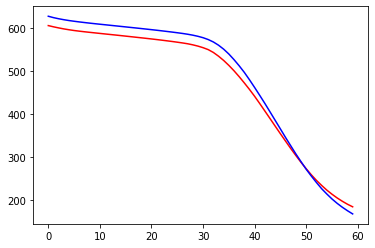

In [14]:
plt.plot(logs.history['val_loss'], c='red')
plt.plot(logs.history['loss'], c='blue')

In [15]:
prediction_neural = model.predict(X_test)
prediction_neural[:10]

array([[18.011053 ],
       [26.030174 ],
       [ 3.397984 ],
       [24.9168   ],
       [ 3.7261438],
       [16.280924 ],
       [12.188079 ],
       [ 3.712619 ],
       [ 3.7261438],
       [ 7.761985 ]], dtype=float32)

In [16]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 7ms/step - loss: 116.4794 - mae: 8.5061


[116.4793930053711, 8.50611686706543]

# Zadanie 3 (8ptk) Porównaj obydwa modele z użyciem współczynnika R kwadrat.


In [17]:
from sklearn.metrics import r2_score
r2_nn = r2_score(y_test, prediction_neural)
r2_lr = r2_score(y_test, prediction_lr)
print(r2_nn)
print(r2_lr)

-0.6633463762234968
0.637457767481718


#Wizualizacja
#Zadanie 1 (7ptk) Stwórz wykres rozrzutu reprezentujący relację pomiędzy kolumnami medv i crim. Nałóż na ten wykres linię trendu.


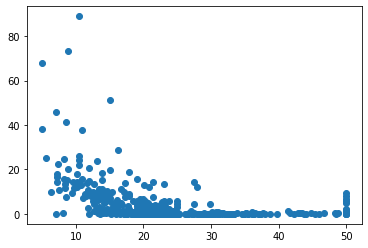

In [18]:
import matplotlib.pyplot as plt

plt.scatter(df['medv'], df['crim'])


#Zadanie 2 (15ptk)
# Stwórz Dashboard, który będzie zawierał:
#a) Wykres słupkowy dla parametrów z modelu liniowego





In [20]:
!pip install dash


     |████████████████████████████████| 7.4 MB 24.0 MB/s 
     |████████████████████████████████| 357 kB 53.5 MB/s 
  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3822 sha256=a01f6a62511aa3aa918f030e1c4e9ad583c5b8cab2a79e00c71ffe4c2cf5b464
  Stored in directory: /root/.cache/pip/wheels/00/f9/c7/1a6437d794ed753ea9bc9079e761d4fc803a1f1f5d3697b9ec
  Created wheel for dash-html-components: filename=dash_html_components-2.0.0-py3-none-any.whl size=4090 sha256=b0f148f5bcae063a235a6718cd691f6df6b71b13c7996a6437bc89f016f6dcab
  Stored in directory: /root/.cache/pip/wheels/ec/6b/81/05aceabd8b27f724e2c96784016287cc1bfbc349ebfda451de
  Created wheel for dash-table: filename=dash_table-5.0.0-py3-none-any.whl size=3912 sha256=97e3f0b35fc3b3af6db318d800e23a468265c34c96e5a41ce7cc9bf40722c386
  Stored in directory: /root/.cache/pip/wheels/85/5d/4e/7c276b57992951dbe770bf5caad6448d0539c510663aefd2e2
Successfully built dash-core-components dash-html-co

In [28]:
import dash

<BarContainer object of 12 artists>

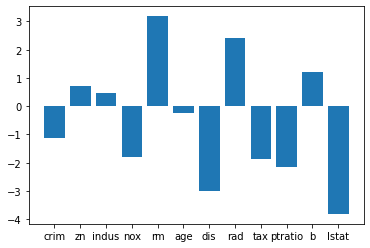

In [25]:
plt.bar(column_names, coefficience)

# b) Histogram dla wybranej kolumny danych

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <a list of 10 Patch objects>)

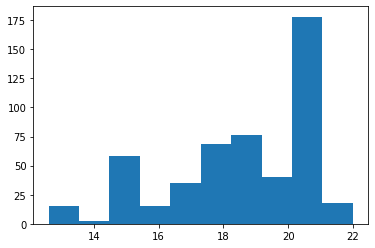

In [26]:
plt.hist(df['ptratio'])

# c) Wykres rozrzutu dla dowolnej pary kolumn

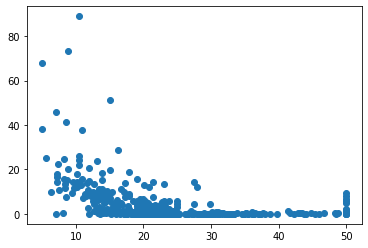

In [27]:
plt.scatter(df['medv'], df['crim'])